# Network analysis of major airport newtork in europe

In [16]:
import pandas as pd
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt
import networkx as nx
import json

In [7]:
airports=pd.read_csv("../data/airports_top50.csv")
fj=pd.read_csv("../data/flights_2023_epidemy.csv")
airports.drop(airports[airports["iata"]=="SXF"].index,inplace=True)
airports.reset_index(drop=True,inplace=True)
with open('../data/flight_dict.json', 'r') as fp:
    flight_dict = json.load(fp)


### Representation of the European Major Airports Network using a Directed Graph

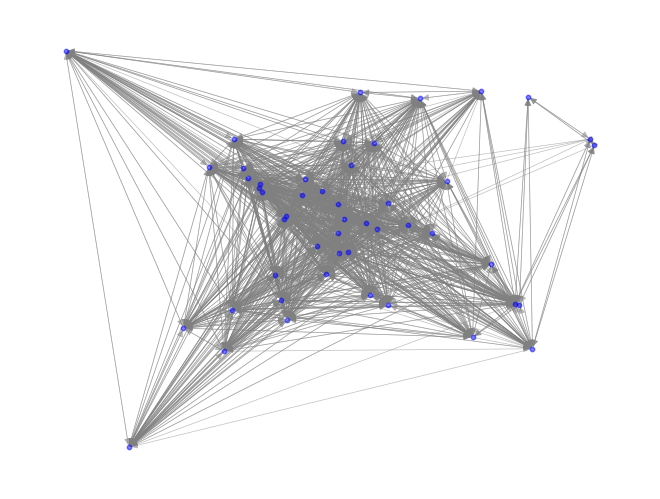

In [18]:

dest = flight_dict
airports_graph = nx.DiGraph()
for i, airport_id in enumerate(list(airports["iata"])):
    longitude, latitude = airports.loc[i,"longitude"], airports.loc[i,"latitude"]
    airports_graph.add_node(airport_id, pos=(longitude, latitude))

for i in dest.keys():
    source_airport = i.upper()
    for dest_airport in dest[i]:
        if not airports_graph.has_edge(source_airport, dest_airport.upper()):
            airports_graph.add_edge(source_airport, dest_airport.upper())


pos = nx.get_node_attributes(airports_graph, 'pos')
nx.draw(airports_graph, pos, node_size=10, node_color='blue', edge_color='grey', width=0.5, alpha=0.5)
plt.show()


### Airport graph analysis

In [19]:
#properties of the graph

print("Number of nodes: ", airports_graph.number_of_nodes())
print("Number of edges: ", airports_graph.number_of_edges())
print("Diameter (max distance between any pair of node): ", nx.diameter(airports_graph))

#clustering coefficient
print("Average clustering coefficient: ", nx.average_clustering(airports_graph))

#average shortest path length
print("Average shortest path length: ", nx.average_shortest_path_length(airports_graph))

#cluster coefficient
print("Clustering coefficient fraction of neighbour connected: ", nx.clustering(airports_graph))

#max edges of the network

print(f"Max edges of the network: {(airports_graph.number_of_nodes()*(airports_graph.number_of_nodes()-1)):.0f}")

#density of the network

print(f"Density of the network: {nx.density(airports_graph):.3f}")



Number of nodes:  49
Number of edges:  1855
Diameter (max distance between any pair of node):  3
Average clustering coefficient:  0.8869805283219605
Average shortest path length:  1.215986394557823
Clustering coefficient fraction of neighbour connected:  {'LHR': 0.9371643394199786, 'CDG': 0.8846371882086168, 'AMS': 0.86, 'FRA': 0.871245911388641, 'IST': 0.7623688155922039, 'BCN': 0.8915029061721561, 'MAD': 0.8777777777777778, 'MUC': 0.8858652575957728, 'SAW': 0.814615797958087, 'FCO': 0.9021706809396373, 'LGW': 0.8891736066623959, 'DME': 0.86, 'ORY': 0.8943308908600077, 'VIE': 0.8486961012135296, 'ZRH': 0.8972125435540069, 'OTP': 0.9048780487804878, 'SVO': 0.7580645161290323, 'CPH': 0.887450462351387, 'ATH': 0.8897219618869103, 'ARN': 0.8840392561983471, 'DUB': 0.9128314538250534, 'OSL': 0.8948491313623895, 'HAM': 0.9006400487656202, 'BRU': 0.8689817376867737, 'LIS': 0.9215625, 'BGY': 0.8826875222182723, 'HEL': 0.8896797153024911, 'MAN': 0.8950029744199881, 'BUD': 0.9061791383219955, '

Overall, the network exhibits characteristics of clustering and short average path lengths, suggesting a well-connected and organized structure. 

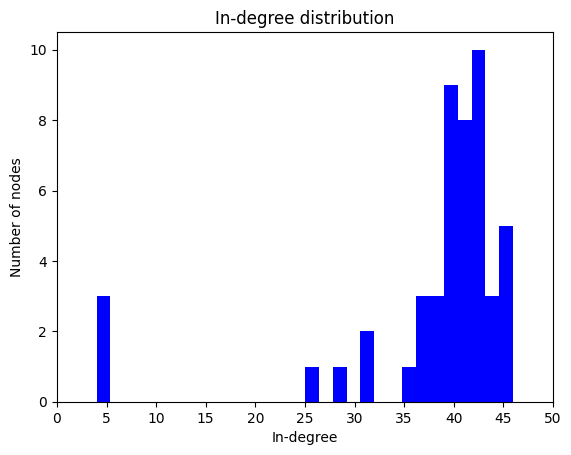

In [20]:
#in-degree distribution

in_degrees = [airports_graph.in_degree(n) for n in airports_graph.nodes()]
plt.hist(in_degrees, bins=30, color='b')
plt.xticks(np.arange(0, 55, 5))
plt.xlabel('In-degree')
plt.ylabel('Number of nodes')
plt.title('In-degree distribution')
plt.show()

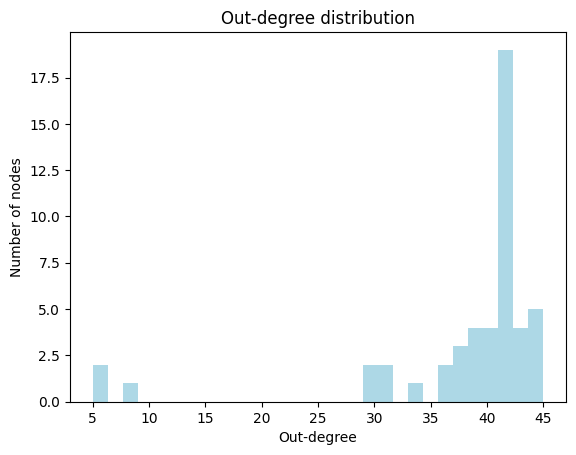

In [21]:

#out-degree distribution

out_degrees = [airports_graph.out_degree(n) for n in airports_graph.nodes()]
plt.hist(out_degrees, bins=30, color='lightblue')
plt.xlabel('Out-degree')
plt.ylabel('Number of nodes')
plt.title('Out-degree distribution')
plt.show()


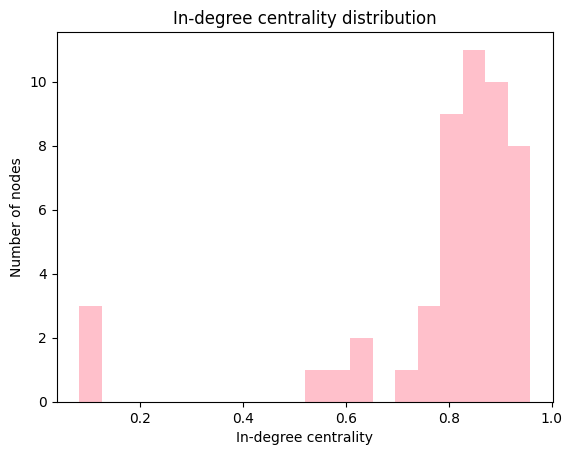

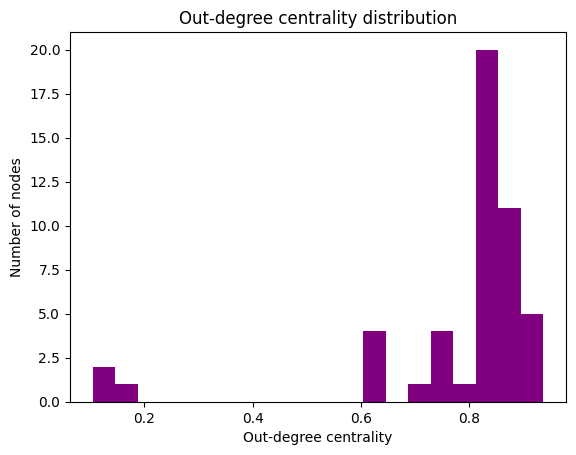

In [22]:
#in and out degree centrality

in_degree_centrality = nx.in_degree_centrality(airports_graph)
plt.hist(in_degree_centrality.values(), bins=20, color='pink')
plt.xlabel('In-degree centrality')
plt.ylabel('Number of nodes')
plt.title('In-degree centrality distribution')
plt.show()

out_degree_centrality = nx.out_degree_centrality(airports_graph)
plt.hist(out_degree_centrality.values(), bins=20, color='purple')
plt.xlabel('Out-degree centrality')
plt.ylabel('Number of nodes')
plt.title('Out-degree centrality distribution')
plt.show()

The degree distribution of the network indicates that the majority of nodes have a high degree, while only a few nodes exhibit lower degrees. Specifically, the in-degree and out-degree distributions show a clear trend of high-degree nodes dominating the network, with only three nodes having degrees ranging from 5 to 10.

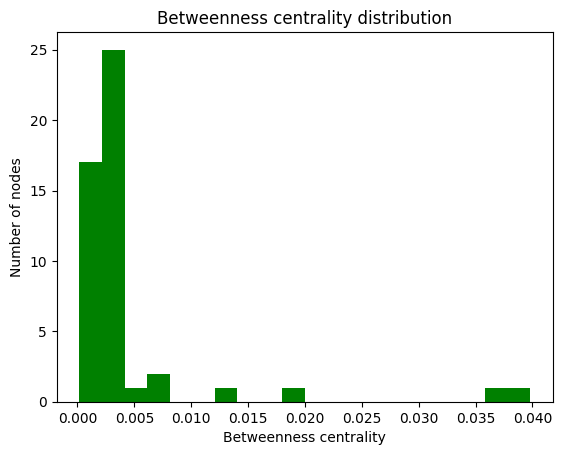

In [23]:
#betweenness centrality
betweenness = nx.betweenness_centrality(airports_graph)
plt.hist(betweenness.values(), bins=20, color='g')
plt.xlabel('Betweenness centrality')
plt.ylabel('Number of nodes')
plt.title('Betweenness centrality distribution')
plt.show()

Examining the betweenness centrality distribution reveals that the majority of nodes have a low betweenness centrality, with the highest values not exceeding 0.040. The latter demonstrates that the major airports in Europe are well connected, without the presence of airport clusters.

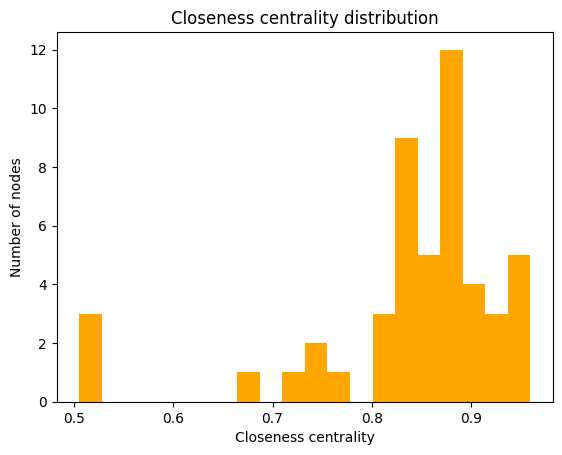

In [24]:
#closeness centrality
closeness = nx.closeness_centrality(airports_graph)
plt.hist(closeness.values(), bins=20, color='orange')
plt.xlabel('Closeness centrality')
plt.ylabel('Number of nodes')
plt.title('Closeness centrality distribution')
plt.show()

The closeness centrality values in the network are consistently distributed above 0.5, indicating that the majority of nodes have efficient access to all other nodes. This implies a highly connected and accessible network structure.